Data shape: (1000, 2)
Labels shape: (1000,)
Train data: (800, 2)
Test data: (200, 2)
KNN Training Accuracy (k=3): 0.99
KNN Test Accuracy (k=3): 0.98


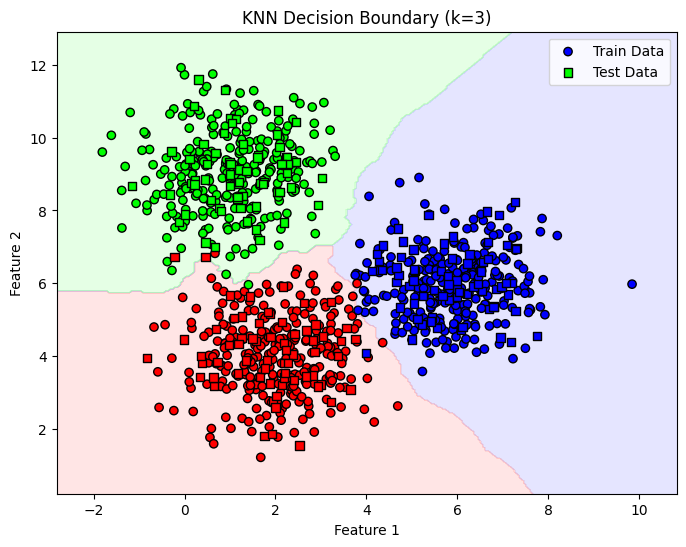

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate simulated dataset
centers = [[2, 4], [6, 6], [1, 9]]
data, labels = make_blobs(n_samples=1000,
                          centers=centers,
                          random_state=150)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Split into train/test (80-20)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8, test_size=0.2, random_state=10
)

print("Train data:", train_data.shape)
print("Test data:", test_data.shape)

# Perform KNN analysis
k = 3
knn_simulated = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knn_simulated.fit(train_data, train_labels)

# Accuracy on training and test sets
train_accuracy = accuracy_score(train_labels, knn_simulated.predict(train_data))
test_accuracy = accuracy_score(test_labels, knn_simulated.predict(test_data))

print(f"KNN Training Accuracy (k={k}): {train_accuracy:.2f}")
print(f"KNN Test Accuracy (k={k}): {test_accuracy:.2f}")

# -------------------------
# Decision Boundary Plot
# -------------------------
# Define color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_points = ListedColormap(["#FF0000", "#0000FF", "#00FF00"])

# Create mesh grid
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict for each point in mesh grid
Z = knn_simulated.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Plot train data
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels,
            cmap=cmap_points, edgecolor="k", marker="o", label="Train Data")

# Plot test data
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels,
            cmap=cmap_points, edgecolor="k", marker="s", label="Test Data")

plt.title(f"KNN Decision Boundary (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
